In [36]:
import random

import pandas as pd 

import requests

from tqdm import tqdm

In [7]:
lottery_45 = list(range(1,46))
total_loop = 5

In [156]:
def virtualTest(total):
    return mat

def backTest(total_set, num_list):
    import numpy as np
    a = total_set[['Num1','Num2', 'Num3', 'Num4', 'Num5', 'Num6']].values == np.array([[num_list]])
    a = a.sum(axis=0).sum(axis=1)
    return a


def getNumber(total_set):
    return list(total_set[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']].apply(pd.Series.value_counts).fillna(0).idxmax())

In [34]:
def getLottoWinInfo(startRound, endRound):
    req_url_base = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo="
    
    drwtNo1 = [] 
    drwtNo2 = [] 
    drwtNo3 = [] 
    drwtNo4 = [] 
    drwtNo5 = [] 
    drwtNo6 = [] 
    
    bnusNo = [] 
    
    totSellamnt = [] 
    
    drwNoDate = [] 
    
    firstAccumamnt = [] 
    
    firstPrzwnerCo = [] 
    
    firstWinamnt = [] 
    
    roundNo = []
    
    for i in tqdm(range(startRound, endRound+1, 1)):
        try:

            # i = 1

            req_url = req_url_base + str(i)

            req_lotto = requests.get(req_url) 

            lottoNo = req_lotto.json() 

            drwtNo1.append(lottoNo['drwtNo1']) 

            drwtNo2.append(lottoNo['drwtNo2']) 

            drwtNo3.append(lottoNo['drwtNo3']) 

            drwtNo4.append(lottoNo['drwtNo4']) 

            drwtNo5.append(lottoNo['drwtNo5']) 

            drwtNo6.append(lottoNo['drwtNo6']) 

            bnusNo.append(lottoNo['bnusNo']) 

            roundNo.append(i)

            totSellamnt.append(lottoNo['totSellamnt']) 

            drwNoDate.append(lottoNo['drwNoDate']) 

            firstAccumamnt.append(lottoNo['firstAccumamnt']) 

            firstPrzwnerCo.append(lottoNo['firstPrzwnerCo']) 

            firstWinamnt.append(lottoNo['firstWinamnt']) 

            lotto_dict = {"추첨일":drwNoDate, "회차":roundNo,
                          "Num1":drwtNo1, "Num2":drwtNo2,
                          "Num3":drwtNo3, "Num4":drwtNo4, "Num5":drwtNo5, 
                          "Num6":drwtNo6, "bnsNum":bnusNo,
                          "총판매금액":totSellamnt,
                          "총1등당첨금":firstAccumamnt,
                          "1등당첨인원":firstPrzwnerCo,
                          "1등수령액":firstWinamnt}

            lotto_df = pd.DataFrame(lotto_dict)
        except:
            pass
        
    return lotto_dict, lotto_df


def backTest(totalnumlist):
    

In [103]:
startRound = 1

endRound = 599

lotto_dict, lotto_df = getLottoWinInfo(startRound, endRound)

100%|████████████████████████████████████████████████████████████████████████████████| 599/599 [02:47<00:00,  3.58it/s]


In [45]:
lotto_df.to_csv('test.csv', index=False)

In [143]:
total_set = pd.read_csv('test.csv')
total_set.head()

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
0,2002-12-07,1,10,23,29,33,37,40,16,3681782000,863604600,0,0
1,2002-12-14,2,9,13,21,25,32,42,2,4904274000,0,1,2002006800
2,2002-12-21,3,11,16,19,21,27,31,30,4729342000,0,1,2000000000
3,2002-12-28,4,14,27,30,31,40,42,2,5271464000,1267147200,0,0
4,2003-01-04,5,16,24,29,40,41,42,3,6277102000,3041094900,0,0


In [159]:
num_list = getNumber(total_set)
bt = backTest(total_set, num_list)

total_set.iloc[np.where(bt>=3)]

,추첨일,회차,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum,총판매금액,총1등당첨금,1등당첨인원,1등수령액
176,2006-04-22,177,1,10,13,16,37,43,6,50480325000,0,7,1693285500
230,2007-05-05,231,5,10,19,31,44,45,27,42355627000,0,9,1088365900
272,2008-02-23,273,1,8,24,31,34,44,6,42816211000,0,3,3339543100
343,2009-07-04,344,1,2,15,28,34,45,38,43838886000,10269745800,7,1467106543
547,2013-06-01,548,1,12,13,21,32,45,14,57771827000,13894975125,8,1736871891
707,2016-06-25,708,2,10,16,19,34,45,1,66806307000,16398208876,4,4099552219
794,2018-02-24,795,3,10,13,26,34,38,36,79661342000,18864747000,11,1714977000
803,2018-04-28,804,1,10,13,26,32,36,9,74557028000,17951961753,11,1631996523
834,2018-12-01,835,9,10,13,28,38,45,35,77694435000,18505216875,15,1233681125
942,2020-12-26,943,1,8,13,36,44,45,39,100081432000,24045315756,7,3435045108


In [160]:
num_list

[1, 10, 13, 31, 34, 45]

array([0, 0, 0, ..., 1, 3, 1])

In [112]:
count_df = lotto_df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6']].apply(pd.Series.value_counts).fillna(0)
count_df

,Num1,Num2,Num3,Num4,Num5,Num6
1,145.0,0.0,0.0,0.0,0.0,0.0
2,116.0,20.0,0.0,0.0,0.0,0.0
3,100.0,33.0,3.0,0.0,0.0,0.0
4,92.0,44.0,4.0,0.0,0.0,0.0
5,83.0,42.0,5.0,1.0,0.0,0.0
6,74.0,38.0,11.0,3.0,0.0,0.0
7,64.0,59.0,10.0,0.0,0.0,0.0
8,49.0,64.0,18.0,3.0,0.0,0.0
9,37.0,52.0,15.0,4.0,1.0,0.0
10,39.0,65.0,33.0,1.0,1.0,0.0


In [139]:
list(ab)

[1, 10, 13, 31, 34, 45]

In [96]:
import matplotlib.pyplot as plt

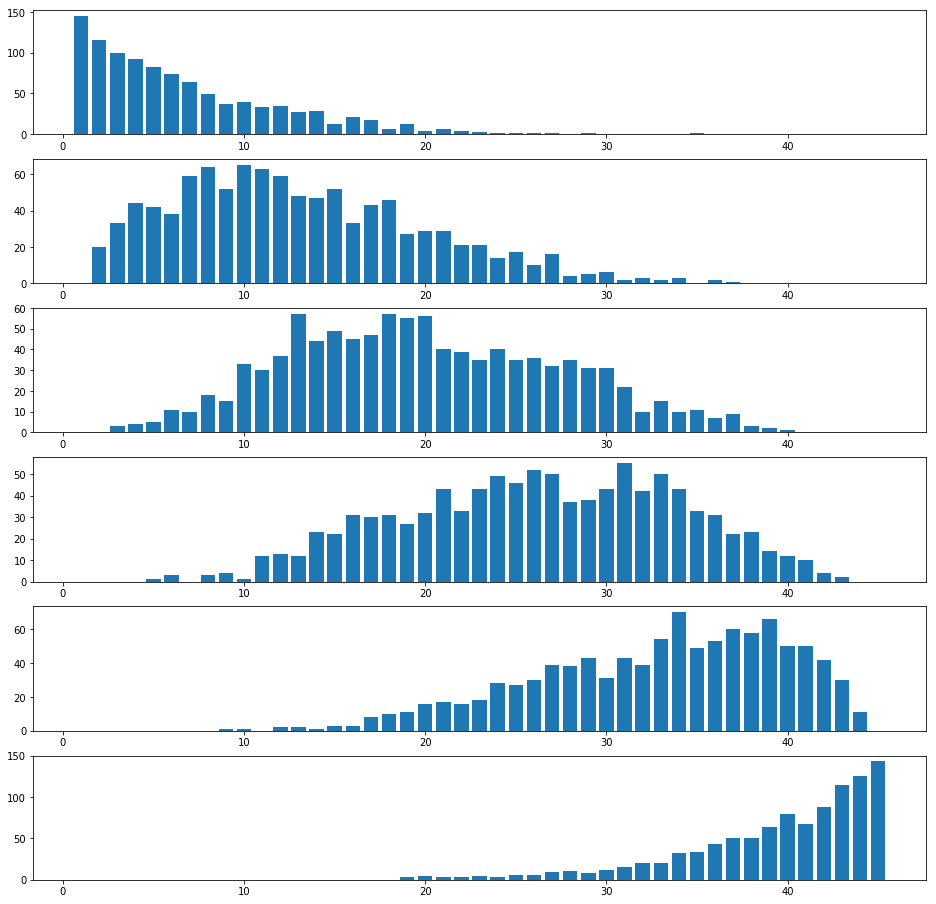

In [114]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(16, 16))
for i in range(1, 7):
#     plt.subplot(i,1,1)
    axes[i-1].bar(count_df['Num{}'.format(str(i))].index, count_df['Num{}'.format(str(i))])

In [116]:
count_df['total'] = lotto_df['Num1'] + lotto_df['Num2'] + lotto_df['Num3'] \
                + lotto_df['Num4'] + lotto_df['Num5'] + lotto_df['Num6'] 

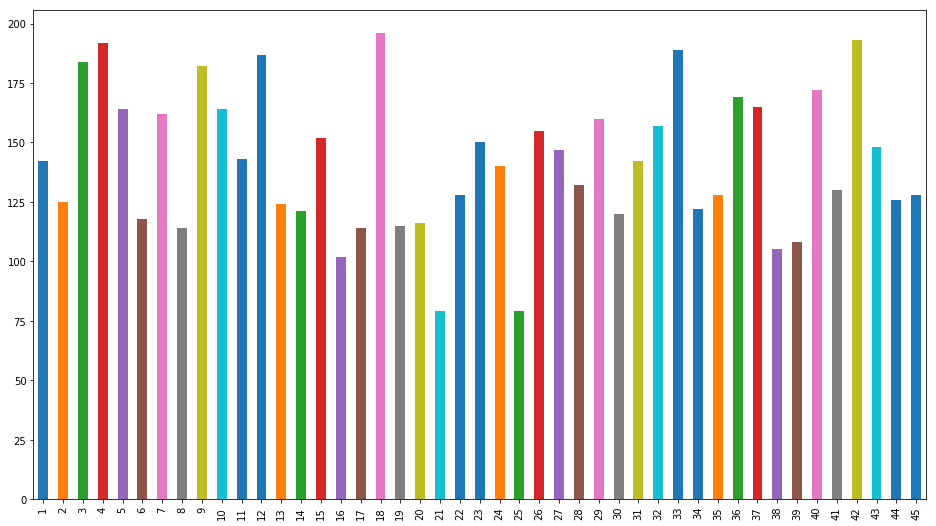

In [117]:
plt.figure(figsize=(16, 9))
count_df['total'].plot.bar()

In [109]:
total= pd.concat([lotto_df,df]).reset_index(drop=True)

In [110]:
total.to_csv('test.csv', index=False)